In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#import numpy as np
#import seaborn as sns
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import PassiveAggressiveClassifier
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import classification_report
#from sklearn.metrics import confusion_matrix 
#import re
#import string 
#import openai

In [2]:
# Set max row and column display
pd.options.display.max_rows=None
pd.options.display.max_columns=None

In [3]:
# Set paths for article CSV files
file_part1 = "Resources/df_merged_articles_clean_part1.csv"
file_part2 = "Resources/df_merged_articles_clean_part2.csv"
file_part3 = "Resources/df_merged_articles_clean_part3.csv"
file_part4 = "Resources/df_merged_articles_clean_part4.csv"

In [4]:
# Read the merged article CSV files into DataFrames
df_merged_articles_clean_part1 = pd.read_csv(file_part1)
df_merged_articles_clean_part2 = pd.read_csv(file_part2)
df_merged_articles_clean_part3 = pd.read_csv(file_part3)
df_merged_articles_clean_part4 = pd.read_csv(file_part4)
print("Input files have been read in")

Input files have been read in


In [5]:
# Concatenate article CSV files into merged dataframe
df_merged_articles_clean = pd.concat([df_merged_articles_clean_part1, df_merged_articles_clean_part2,
                                     df_merged_articles_clean_part3, df_merged_articles_clean_part4],
                                     ignore_index=True)

In [6]:
# Print first 5 rows of df_merged_articles_clean dataframe
df_merged_articles_clean.head()

,title,text,cleaned_text,subject,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,donald trump wish american happy new year leav...,News,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,house intelligence committee chairman devin nu...,News,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",friday revealed former milwaukee sheriff david...,News,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",christmas day donald trump announced would bac...,News,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,pope francis used annual christmas day message...,News,0


In [7]:
# Display shape of df_merged_articles_clean dataframe
df_merged_articles_clean.shape

(44898, 5)

In [8]:
# Rows with null cleaned_text column contain article text that are URLs or blank.
# These rows can be deleted with a small impact on the overall row count (reduced from 44898 to 44182).
df_merged_articles_revised = df_merged_articles_clean.dropna(subset=['cleaned_text'])
print(df_merged_articles_revised.head())

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text  \
0  Donald Trump just couldn t wish all Americans ...   
1  House Intelligence Committee Chairman Devin Nu...   
2  On Friday, it was revealed that former Milwauk...   
3  On Christmas day, Donald Trump announced that ...   
4  Pope Francis used his annual Christmas Day mes...   

                                        cleaned_text subject  class  
0  donald trump wish american happy new year leav...    News      0  
1  house intelligence committee chairman devin nu...    News      0  
2  friday revealed former milwaukee sheriff david...    News      0  
3  christmas day donald trump announced would 

In [9]:
# Display shape of df_merged_articles_revised dataframe
df_merged_articles_revised.shape

(44182, 5)

In [10]:
# Display info for of df_merged_articles_clean dataframe
df_merged_articles_revised.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44182 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         44182 non-null  object
 1   text          44182 non-null  object
 2   cleaned_text  44182 non-null  object
 3   subject       44182 non-null  object
 4   class         44182 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.0+ MB


In [11]:
# Create smaller dataframe to separate articles into real and fake dataframes to use in WordCloud
wordcloud_cols = ['cleaned_text', 'class']

# Create new df_articles_wc dataframe
df_articles_wc = df_merged_articles_revised[wordcloud_cols]

# Display first 5 rows of df_articles_wc dataframe
df_articles_wc.head()

,cleaned_text,class
0,donald trump wish american happy new year leav...,0
1,house intelligence committee chairman devin nu...,0
2,friday revealed former milwaukee sheriff david...,0
3,christmas day donald trump announced would bac...,0
4,pope francis used annual christmas day message...,0


In [12]:
# Create df_real_articles_wc dataframe with real articles (class=1) to analyze using WordCloud
df_real_articles_wc = df_articles_wc.loc[df_articles_wc['class'] == 1]
print(df_real_articles_wc.shape)
print(df_real_articles_wc.head())

(21416, 2)
                                            cleaned_text  class
23481  washington reuters head conservative republica...      1
23482  washington reuters transgender people allowed ...      1
23483  washington reuters special counsel investigati...      1
23484  washington reuters trump campaign adviser geor...      1
23485  seattlewashington reuters president donald tru...      1


In [13]:
# Create df_fake_articles_wc dataframe with fake articles (class=0) to analyze using WordCloud
df_fake_articles_wc = df_articles_wc.loc[df_articles_wc['class'] == 0]
print(df_fake_articles_wc.shape)
print(df_fake_articles_wc.head())

(22766, 2)
                                        cleaned_text  class
0  donald trump wish american happy new year leav...      0
1  house intelligence committee chairman devin nu...      0
2  friday revealed former milwaukee sheriff david...      0
3  christmas day donald trump announced would bac...      0
4  pope francis used annual christmas day message...      0


In [14]:
# Create real articles text string to analyze using WordCloud
real_articles_text = ' '.join(df_real_articles_wc['cleaned_text'])
print(f'Number of words in real articles: {len(real_articles_text)}')

Number of words in real articles: 36113471


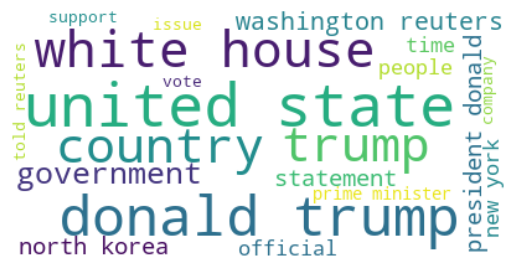

In [15]:
# Set WordCloud stopwords for real articles
stopwords_wc_real = set(STOPWORDS)

# Add additonal stopwords
new_words_real = ['u', 'two', 'said', 'know', 'monday', 'tuesday', 'wednesday', 'thursday',
                 'friday', 'saturday', 'sunday', 'say', 'saying', 'one', 'including',
                 'called', 'many', 'may']
new_stopwords_real = stopwords_wc_real.union(new_words_real)

# Create and generate WordCloud image:
wordcloud = WordCloud(max_font_size=50, max_words=20, background_color='white',
                      stopwords=new_stopwords_real, colormap='viridis').generate(real_articles_text)

# Display WordCloud image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
# Create fake articles text string to analyze using WordCloud
fake_articles_text = ' '.join(df_fake_articles_wc['cleaned_text'])
print(f'Number of words in fake articles: {len(fake_articles_text)}')

Number of words in fake articles: 40115625


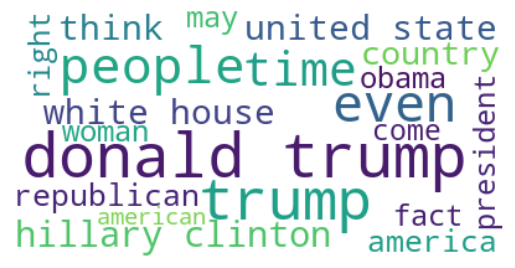

In [17]:
# Set WordCloud stopwords for fake articles
stopwords_wc_fake = set(STOPWORDS)

# Add additonal stopwords
new_words_fake = ['u','say', 'know', 'said', 'one', 'via', 'way', 'many', 'well']
new_stopwords_fake = stopwords_wc_fake.union(new_words_fake)

# Create and generate a WordCloud image:
wordcloud = WordCloud(max_font_size=50, max_words=20, background_color='white',
                      stopwords=new_stopwords_fake, colormap='viridis').generate(fake_articles_text)

# Display WordCloud image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()